In [1]:
import mysql.connector as mysql
import requests
import pandas as pd

In [2]:
con = mysql.connect(host='127.0.0.1', port='33069', database='chatbot_schema', user='root', password='my-secret-pw')
cur = con.cursor(dictionary=True, buffered=True)

Моя бд. Несколько строк заполнены ручками, остальное буду полуавтоматически

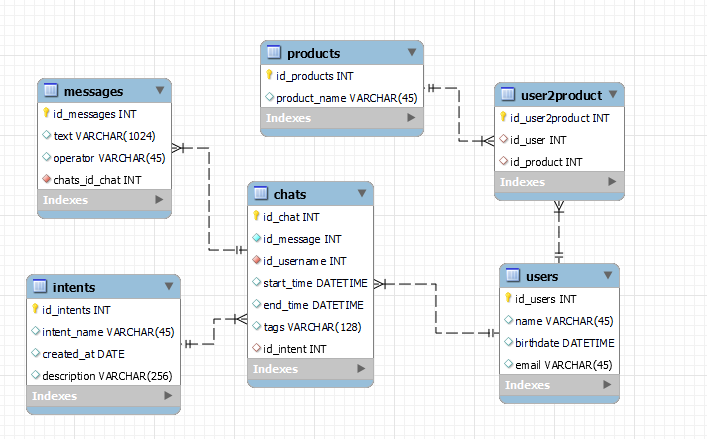

In [3]:
from random import randrange, choice
from datetime import timedelta
from datetime import datetime

start_date = []
end_date = []
created_at = []
birthdates = []

for i in range(120):
    try:
        month = randrange(1, 12)
        day = randrange(1, 31)
        
        mins = randrange(0, 59)
#         if mins in range(0, 10):
#             mins = str(0) + str(mins)
        hours = randrange(1, 12)
        if hours in range(0, 10):
            hours = str(0) + str(hours)
            
        secs = randrange(0, 59)
        if secs in range(0, 10):
            secs = str(0) + str(secs)

        years = randrange(1920, 2020)
           
            
        shit = choice(['AM', 'PM'])
        bd = datetime.strptime(f'{month}/{day}/{years} {hours}:{mins}:{secs} {shit}', '%m/%d/%Y %I:%M:%S %p')
        bd = bd.strftime('%Y-%m-%d %H:%M:%S')
        d0 = datetime.strptime(f'{month}/{day}/2020 {hours}:{mins}:{secs} {shit}', '%m/%d/%Y %I:%M:%S %p')
        d0 = d0.strftime('%Y-%m-%d %H:%M:%S')
        d1 = datetime.strptime(f'{month}/{day}/2021 {hours}:{mins}:{secs} {shit}', '%m/%d/%Y %I:%M:%S %p')
        d2 = (d1 + timedelta(hours=randrange(0,1), minutes=randrange(0,60), seconds=randrange(0,60)))
       
        d1 = d1.strftime('%Y-%m-%d %H:%M:%S')
        d2 = d2.strftime('%Y-%m-%d %H:%M:%S')
        
        created_at.append(d0)
        start_date.append(d1)
        end_date.append(d2)
        birthdates.append(bd)
    except:
        pass
    
start_date = start_date[:100]
end_date = end_date[:100]
created_at = created_at[:3]
birthdates = birthdates[:100]

In [4]:
tags = ['new', 'old', 'discont']
operator = ['bot', 'human']
intent_name = ['Как снять валюту', 'Как купить пирожки', 'Как закончить вышку и не умереть']

In [5]:
from string import punctuation
punctuation += '...' + '—' + '…' + '«»'
import re

replics = []
with open('tolstoy.txt') as f:
    texts = f.read().split('.')
    for text in texts[500:]:
        text = re.sub('[0-9a-zA-Z]+', '', text)
        text = [word.lower().strip().strip(punctuation) for word in text.split()]
        replics.append(' '.join(text))

In [6]:
import names

user_names = []
for i in range(100):
    user_names.append(names.get_full_name())

In [7]:
import random
import string
emails = []
def random_char(char_num):
       return ''.join(random.choice(string.ascii_letters) for _ in range(char_num))

for n in range(100):
    emails.append(random_char(7)+"@gmail.com")

### inserting users

In [38]:
sql = "INSERT INTO users (name, birthdate, email) VALUES (%s, %s, %s)"

val = []
for i in range(100):
    val.append((user_names[i], birthdates[i], emails[i]))

cur.executemany(sql, val)
con.commit()

In [8]:
cur = con.cursor(dictionary=True, buffered=True)

cur.execute(
'select * from users')

df = pd.DataFrame(cur.fetchall())
df

,id_users,name,birthdate,email
0,307,Frank White,1949-08-02 20:26:03,nnDZpFK@gmail.com
1,308,Maria Dietrich,2012-09-01 07:45:35,HfwtLCY@gmail.com
2,309,Carlton Oneil,1948-11-19 18:25:06,CiCatSa@gmail.com
3,310,Nicole Gutierrez,1946-09-12 07:40:45,TMtuPiz@gmail.com
4,311,John Morgan,1959-04-25 02:18:31,eMACZdC@gmail.com
...,...,...,...,...
95,402,Ruth Aiello,2009-08-07 07:41:08,sOSorff@gmail.com
96,403,Robert Miller,1974-11-16 17:22:24,FTuuPJt@gmail.com
97,404,Jeanne Brooks,2010-09-13 07:19:13,INMyatB@gmail.com
98,405,Mary Gharing,1928-01-02 06:08:27,pfcFRGX@gmail.com


### Продукты
Мне было лень добавлять через питон

In [9]:
cur = con.cursor(dictionary=True, buffered=True)

cur.execute(
'select * from products')

df = pd.DataFrame(cur.fetchall())
df

,id_products,product_name
0,1,Дебетовка
1,2,Кредитка
2,3,Кредит
3,4,Страховка
4,5,Ипотека


### Теперь замутим связь юзеров и продуктов

In [25]:
cur = con.cursor(dictionary=True, buffered=True)

cur.execute(
'select id_users from users')

df_id_user = pd.DataFrame(cur.fetchall())
id_user_l = list(df_id_user.id_users)
df_id_user

,id_users
0,307
1,308
2,309
3,310
4,311
...,...
95,402
96,403
97,404
98,405


In [24]:
cur = con.cursor(dictionary=True, buffered=True)

cur.execute(
'select * from products')

df = pd.DataFrame(cur.fetchall())
df

,id_products,product_name
0,1,Дебетовка
1,2,Кредитка
2,3,Кредит
3,4,Страховка
4,5,Ипотека


In [29]:
sql = "INSERT INTO user2product (id_user, id_product) VALUES (%s, %s)"

val = []
for user_id in range(len(id_user_l)):
    n_products = random.sample(range(1, 6), random.randint(1, 5))
    for i, n in enumerate(range(len(n_products))):
        val.append((id_user_l[user_id], n_products[i]))
        
cur.executemany(sql, val)
con.commit()

In [23]:
cur.execute(
'select * from user2product')

df = pd.DataFrame(cur.fetchall())
df

,id_user2product,id_user,id_product
0,3068,307,4
1,3069,308,3
2,3070,308,4
3,3071,308,5
4,3072,309,1
...,...,...,...
304,3372,405,3
305,3373,406,2
306,3374,406,1
307,3375,406,3


### Теперь интенты

In [43]:
descriptions = ['Клиент хочет снять валюту - доллары, евро и прочее', "Клиент хочет купить пирожки - с яйцом и рисом лучшие!",
                "Никак"]

sql = "INSERT INTO intents (intent_name, created_at, description) VALUES (%s, %s, %s)"

val = []
for i in range(len(intent_name)):
    val.append((intent_name[i], created_at[i], descriptions[i]))
  
cur.executemany(sql, val)
con.commit()

[('Как снять валюту', '2020-10-11 03:05:47', 'Клиент хочет снять валюту - доллары, евро и прочее'), ('Как купить пирожки', '2020-06-12 14:35:27', 'Клиент хочет купить пирожки - с яйцом и рисом лучшие!'), ('Как закончить вышку и не умереть', '2020-01-16 08:49:52', 'Никак')]


In [3]:
cur.execute(
'select * from intents')

df_id_intents = pd.DataFrame(cur.fetchall())
df_id_intents

,id_intents,intent_name,created_at,description
0,3,Как снять валюту,2020-10-11,"Клиент хочет снять валюту - доллары, евро и пр..."
1,4,Как купить пирожки,2020-06-12,Клиент хочет купить пирожки - с яйцом и рисом ...
2,5,Как закончить вышку и не умереть,2020-01-16,Никак


### Теперь чаты

In [203]:
sql = "INSERT INTO chats (id_username, start_time, end_time, tags, id_intent) VALUES (%s, %s, %s, %s, %s, %s)"

id_users = df_id_user.id_users

val = []
for i in range(len(id_users)):
    n_messages = randrange(1, 10)
    for n in range(n_messages):
        val.append((int(id_users[i]), start_date[i], end_date[i], tags[randrange(0,2)], int(list(df.id_intents)[randrange(0,2)])))
        
cur.executemany(sql, val)
con.commit()

In [4]:
cur.execute(
'select * from chats')

df = pd.DataFrame(cur.fetchall())
chats_ids = list(df.id_chat)

,id_chat,id_username,start_time,end_time,tags,id_intent
0,8,307,2021-10-11 03:05:47,2021-10-11 03:49:04,old,3
1,9,307,2021-10-11 03:05:47,2021-10-11 03:49:04,new,4
2,10,308,2021-06-12 14:35:27,2021-06-12 15:23:48,old,3
3,11,309,2021-01-16 08:49:52,2021-01-16 09:06:38,new,3
4,12,309,2021-01-16 08:49:52,2021-01-16 09:06:38,old,4
...,...,...,...,...,...,...
489,497,406,2021-10-11 09:13:22,2021-10-11 09:21:35,old,4
490,498,406,2021-10-11 09:13:22,2021-10-11 09:21:35,old,3
491,499,406,2021-10-11 09:13:22,2021-10-11 09:21:35,new,4
492,500,406,2021-10-11 09:13:22,2021-10-11 09:21:35,new,3


### И последнее - сообщения

In [ ]:
sql = "INSERT INTO messages (text, operator, chats_id_chat) VALUES (%s, %s, %s)"
replics = replics[:1000]


val = []
for i in range(len(replics)):
    val.append((replics[i][:1024], operator[randrange(0,1)], chats_ids[randrange(0, len(chats_ids))]))
cur.executemany(sql, val)
con.commit()

In [224]:
cur.execute(
'select * from messages')

df = pd.DataFrame(cur.fetchall())
df

,id_messages,text,operator,chats_id_chat
0,5003,гости стали расходиться,bot,333
1,5004,пьер был неуклюж,bot,496
2,5005,толстый выше обыкновенного роста широкий с огр...,bot,482
3,5006,кроме того он был рассеян,bot,499
4,5007,вставая он вместо своей шляпы захватил треугол...,bot,8
...,...,...,...,...
995,5998,марья дмитриевна всегда говорила по-русски,bot,135
996,5999,– имениннице дорогой с детками – сказала она с...,bot,486
997,6000,– ты что старый греховодник – обратилась она к...,bot,151
998,6001,– ну что казак мой марья дмитриевна казаком на...,bot,82


## Пошли запросы

### Ввод был показен выше, теперь апдейт

In [19]:
cur.execute(
'SELECT * from users'
)

df = pd.DataFrame(cur.fetchall())
df

,id_users,name,birthdate,email
0,307,Frank White,1949-08-02 20:26:03,nnDZpFK@gmail.com
1,308,Maria Dietrich,2012-09-01 07:45:35,HfwtLCY@gmail.com
2,309,Carlton Oneil,1948-11-19 18:25:06,CiCatSa@gmail.com
3,310,Nicole Gutierrez,1946-09-12 07:40:45,TMtuPiz@gmail.com
4,311,John Morgan,1959-04-25 02:18:31,eMACZdC@gmail.com
...,...,...,...,...
95,402,Ruth Aiello,2009-08-07 07:41:08,sOSorff@gmail.com
96,403,Robert Miller,1974-11-16 17:22:24,FTuuPJt@gmail.com
97,404,Jeanne Brooks,2010-09-13 07:19:13,INMyatB@gmail.com
98,405,Mary Gharing,1928-01-02 06:08:27,pfcFRGX@gmail.com


In [21]:
cur.execute(
    'UPDATE users \
     SET name="Michail Petrovich", email="micha777228@mail.ru" \
     WHERE id_users=404'
)

In [22]:
cur.execute(
'SELECT * from users'
)
df = pd.DataFrame(cur.fetchall())
df

,id_users,name,birthdate,email
0,307,Frank White,1949-08-02 20:26:03,nnDZpFK@gmail.com
1,308,Maria Dietrich,2012-09-01 07:45:35,HfwtLCY@gmail.com
2,309,Carlton Oneil,1948-11-19 18:25:06,CiCatSa@gmail.com
3,310,Nicole Gutierrez,1946-09-12 07:40:45,TMtuPiz@gmail.com
4,311,John Morgan,1959-04-25 02:18:31,eMACZdC@gmail.com
...,...,...,...,...
95,402,Ruth Aiello,2009-08-07 07:41:08,sOSorff@gmail.com
96,403,Robert Miller,1974-11-16 17:22:24,FTuuPJt@gmail.com
97,404,Michail Petrovich,2010-09-13 07:19:13,micha777228@mail.ru
98,405,Mary Gharing,1928-01-02 06:08:27,pfcFRGX@gmail.com


### Удаление

In [4]:
cur.execute(
'SELECT * from intents'
)
df = pd.DataFrame(cur.fetchall())
df

,id_intents,intent_name,created_at,description
0,3,Как снять валюту,2020-10-11,"Клиент хочет снять валюту - доллары, евро и пр..."
1,4,Как купить пирожки,2020-06-12,Клиент хочет купить пирожки - с яйцом и рисом ...
2,5,Как закончить вышку и не умереть,2020-01-16,Никак


In [5]:
cur.execute(
    'DELETE FROM intents \
     WHERE id_intents=5'
)

In [6]:
cur.execute(
'SELECT * from intents'
)
df = pd.DataFrame(cur.fetchall())
df

,id_intents,intent_name,created_at,description
0,3,Как снять валюту,2020-10-11,"Клиент хочет снять валюту - доллары, евро и пр..."
1,4,Как купить пирожки,2020-06-12,Клиент хочет купить пирожки - с яйцом и рисом ...


In [9]:
cur.execute(
'SELECT * from chats \
GROUP BY id_intent'
)
df = pd.DataFrame(cur.fetchall())
df

,id_chat,id_username,start_time,end_time,tags,id_intent
0,8,307,2021-10-11 03:05:47,2021-10-11 03:49:04,old,3
1,9,307,2021-10-11 03:05:47,2021-10-11 03:49:04,new,4


In [11]:
cur.execute(
    'DELETE FROM messages \
     WHERE id_messages=5003'
)

In [12]:
cur.execute(
'SELECT * from messages'
)
df = pd.DataFrame(cur.fetchall())
df

,id_messages,text,operator,chats_id_chat
0,5004,пьер был неуклюж,bot,496
1,5005,толстый выше обыкновенного роста широкий с огр...,bot,482
2,5006,кроме того он был рассеян,bot,499
3,5007,вставая он вместо своей шляпы захватил треугол...,bot,8
4,5008,но вся его рассеянность и неуменье войти в сал...,bot,337
...,...,...,...,...
994,5998,марья дмитриевна всегда говорила по-русски,bot,135
995,5999,– имениннице дорогой с детками – сказала она с...,bot,486
996,6000,– ты что старый греховодник – обратилась она к...,bot,151
997,6001,– ну что казак мой марья дмитриевна казаком на...,bot,82


### Вложенные селекты

In [25]:
cur.execute(
'SELECT * \
FROM users \
WHERE id_users in ( \
    SELECT id_username \
    FROM chats \
    WHERE tags LIKE "new") \
GROUP BY name'
)

df = pd.DataFrame(cur.fetchall())
df

,id_users,name,birthdate,email
0,307,Frank White,1949-08-02 20:26:03,nnDZpFK@gmail.com
1,309,Carlton Oneil,1948-11-19 18:25:06,CiCatSa@gmail.com
2,310,Nicole Gutierrez,1946-09-12 07:40:45,TMtuPiz@gmail.com
3,311,John Morgan,1959-04-25 02:18:31,eMACZdC@gmail.com
4,312,Jeremy Evans,2015-01-30 01:35:06,qPmCVBB@gmail.com
...,...,...,...,...
89,402,Ruth Aiello,2009-08-07 07:41:08,sOSorff@gmail.com
90,403,Robert Miller,1974-11-16 17:22:24,FTuuPJt@gmail.com
91,404,Jeanne Brooks,2010-09-13 07:19:13,INMyatB@gmail.com
92,405,Mary Gharing,1928-01-02 06:08:27,pfcFRGX@gmail.com


In [51]:
cur.execute(
'SELECT * \
FROM users \
WHERE id_users in ( \
    SELECT id_user \
    FROM products, user2product \
    WHERE products.id_products=user2product.id_product \
    AND product_name LIKE "Дебетовка")'
)

df = pd.DataFrame(cur.fetchall())
df

,id_users,name,birthdate,email
0,309,Carlton Oneil,1948-11-19 18:25:06,CiCatSa@gmail.com
1,310,Nicole Gutierrez,1946-09-12 07:40:45,TMtuPiz@gmail.com
2,311,John Morgan,1959-04-25 02:18:31,eMACZdC@gmail.com
3,313,Crystal Esquivel,1942-08-16 14:34:09,NJHlXis@gmail.com
4,316,Judy Elliot,1957-01-30 05:09:25,MqnTVer@gmail.com
5,317,Martha Whitmore,1997-04-21 23:42:06,WBmPBYD@gmail.com
6,318,Kathryn Vail,1961-11-06 03:45:23,REAviIY@gmail.com
7,322,Frank Heffron,1996-07-06 03:23:48,rKpavAJ@gmail.com
8,324,Frank Smolder,1963-05-19 21:02:27,elsTDNH@gmail.com
9,325,Eusebio Cooper,1998-01-03 04:52:06,tOHgkxI@gmail.com


### Запросы с 3 таблицами в условии

In [21]:
cur.execute(
'select name, product_name \
FROM users, user2product, products \
WHERE users.id_users=user2product.id_user \
AND products.id_products=user2product.id_product \
ORDER BY id_users')
df = pd.DataFrame(cur.fetchall())
df

,name,product_name
0,Frank White,Страховка
1,Maria Dietrich,Кредит
2,Maria Dietrich,Страховка
3,Maria Dietrich,Ипотека
4,Carlton Oneil,Дебетовка
...,...,...
304,Mary Gharing,Ипотека
305,Elizabeth Johnson,Дебетовка
306,Elizabeth Johnson,Кредитка
307,Elizabeth Johnson,Кредит


In [12]:
cur.execute(
'SELECT name, birthdate, email, product_name \
 FROM users, products, user2product \
 WHERE users.id_users=user2product.id_user \
 AND products.id_products=user2product.id_product \
 ORDER BY name'
)

df = pd.DataFrame(cur.fetchall())
df

,name,birthdate,email,product_name
0,Agnes Laguire,1962-08-07 08:15:03,LpnLgRj@gmail.com,Дебетовка
1,Aileen Danson,2015-04-05 03:54:11,pSpliCn@gmail.com,Дебетовка
2,Al Gray,1939-04-19 23:17:40,cUqmmvK@gmail.com,Кредитка
3,Al Gray,1939-04-19 23:17:40,cUqmmvK@gmail.com,Страховка
4,Al Gray,1939-04-19 23:17:40,cUqmmvK@gmail.com,Ипотека
...,...,...,...,...
304,Wilford Allbritton,2019-01-27 01:39:24,sSnfcYI@gmail.com,Ипотека
305,Wilford Allbritton,2019-01-27 01:39:24,sSnfcYI@gmail.com,Дебетовка
306,Wilford Allbritton,2019-01-27 01:39:24,sSnfcYI@gmail.com,Страховка
307,Wilford Allbritton,2019-01-27 01:39:24,sSnfcYI@gmail.com,Кредит


Юзеры с 4+ продуктами

In [81]:
cur.execute(
    'SELECT name, birthdate, email, count(product_name) as n_prod \
     FROM users, products, user2product \
     WHERE users.id_users=user2product.id_user \
     AND products.id_products=user2product.id_product \
     GROUP BY name, birthdate, email \
     HAVING n_prod > 3'
)
df = pd.DataFrame(cur.fetchall())
df

,name,birthdate,email,n_prod
0,Nicole Gutierrez,1946-09-12 07:40:45,TMtuPiz@gmail.com,4
1,John Morgan,1959-04-25 02:18:31,eMACZdC@gmail.com,4
2,Crystal Esquivel,1942-08-16 14:34:09,NJHlXis@gmail.com,5
3,Judy Elliot,1957-01-30 05:09:25,MqnTVer@gmail.com,5
4,Kathryn Vail,1961-11-06 03:45:23,REAviIY@gmail.com,5
5,Frank Heffron,1996-07-06 03:23:48,rKpavAJ@gmail.com,4
6,Frank Smolder,1963-05-19 21:02:27,elsTDNH@gmail.com,5
7,Eusebio Cooper,1998-01-03 04:52:06,tOHgkxI@gmail.com,5
8,Armando Obrien,1955-09-25 13:31:28,rXDUaat@gmail.com,5
9,Sonya Kilgore,1933-02-15 11:21:31,obeaqfh@gmail.com,4


Количество юзеров с продуктом 4

In [97]:
cur.execute(
'SELECT * from user2product WHERE id_product=4'
)
df = pd.DataFrame(cur.fetchall())
df

,id_user2product,id_user,id_product
0,3068,307,4
1,3070,308,4
2,3081,311,4
3,3085,313,4
4,3094,316,4
...,...,...,...
58,3355,400,4
59,3360,401,4
60,3362,403,4
61,3370,405,4


In [98]:
cur.execute(
'SELECT COUNT(id_user) from user2product WHERE id_product=4'
)
df = pd.DataFrame(cur.fetchall())
df

,COUNT(id_user)
0,63


Среднее по продуктам

In [93]:
cur.execute(
    'SELECT product_name, AVG(n_prod) from ( \
     SELECT name, birthdate, email, product_name, COUNT(product_name) as n_prod \
     FROM users, products, user2product \
     WHERE users.id_users=user2product.id_user \
     AND products.id_products=user2product.id_product \
     GROUP BY name, birthdate, email) as t1\
     GROUP BY product_name'
)
df = pd.DataFrame(cur.fetchall())
df

,product_name,AVG(n_prod)
0,Дебетовка,3.7288
1,Кредитка,2.4348
2,Кредит,2.1818
3,Страховка,1.5000
4,Ипотека,1.0000


### Запросы с JOIN

In [58]:
cur.execute(
    'SELECT * \
    FROM chats \
    JOIN users ON chats.id_username=users.id_users'
)
df = pd.DataFrame(cur.fetchall())
df

,id_chat,id_username,start_time,end_time,tags,id_intent,id_users,name,birthdate,email
0,8,307,2021-10-11 03:05:47,2021-10-11 03:49:04,old,3,307,Frank White,1949-08-02 20:26:03,nnDZpFK@gmail.com
1,9,307,2021-10-11 03:05:47,2021-10-11 03:49:04,new,4,307,Frank White,1949-08-02 20:26:03,nnDZpFK@gmail.com
2,10,308,2021-06-12 14:35:27,2021-06-12 15:23:48,old,3,308,Maria Dietrich,2012-09-01 07:45:35,HfwtLCY@gmail.com
3,11,309,2021-01-16 08:49:52,2021-01-16 09:06:38,new,3,309,Carlton Oneil,1948-11-19 18:25:06,CiCatSa@gmail.com
4,12,309,2021-01-16 08:49:52,2021-01-16 09:06:38,old,4,309,Carlton Oneil,1948-11-19 18:25:06,CiCatSa@gmail.com
...,...,...,...,...,...,...,...,...,...,...
489,497,406,2021-10-11 09:13:22,2021-10-11 09:21:35,old,4,406,Elizabeth Johnson,1936-05-11 15:47:03,pBMFHrL@gmail.com
490,498,406,2021-10-11 09:13:22,2021-10-11 09:21:35,old,3,406,Elizabeth Johnson,1936-05-11 15:47:03,pBMFHrL@gmail.com
491,499,406,2021-10-11 09:13:22,2021-10-11 09:21:35,new,4,406,Elizabeth Johnson,1936-05-11 15:47:03,pBMFHrL@gmail.com
492,500,406,2021-10-11 09:13:22,2021-10-11 09:21:35,new,3,406,Elizabeth Johnson,1936-05-11 15:47:03,pBMFHrL@gmail.com


In [70]:
cur.execute(
    'SELECT * \
    FROM chats \
    LEFT JOIN messages ON chats.id_username=messages.chats_id_chat \
    GROUP BY id_username'
)
df = pd.DataFrame(cur.fetchall())
df

,id_chat,id_username,start_time,end_time,tags,id_intent,id_messages,text,operator,chats_id_chat
0,8,307,2021-10-11 03:05:47,2021-10-11 03:49:04,old,3,5771.0,– прибавила она с участием закатывая глаза,bot,307.0
1,10,308,2021-06-12 14:35:27,2021-06-12 15:23:48,old,3,5261.0,долохов играл во все игры и почти всегда выигр...,bot,308.0
2,11,309,2021-01-16 08:49:52,2021-01-16 09:06:38,new,3,5361.0,с утра не переставая подъезжали и отъезжали цу...,bot,309.0
3,13,310,2021-07-25 02:34:20,2021-07-25 03:06:10,new,4,5148.0,– прощай лиза,bot,310.0
4,21,311,2021-06-11 19:33:56,2021-06-11 20:32:27,old,4,5298.0,анатоль принес две свечки и поставил их на под...,bot,311.0
...,...,...,...,...,...,...,...,...,...,...
95,472,402,2021-08-29 21:44:06,2021-08-29 22:42:39,new,4,NaN,None,None,NaN
96,479,403,2021-02-27 20:34:05,2021-02-27 21:14:00,new,4,5809.0,на другой день приехал князь василий и помести...,bot,403.0
97,485,404,2021-05-30 06:49:05,2021-05-30 07:16:39,old,4,NaN,None,None,NaN
98,491,405,2021-07-12 13:42:22,2021-07-12 13:57:42,old,3,5580.0,– не хотите ну так подите сюда – сказала она и...,bot,405.0
